<a href="https://colab.research.google.com/github/23061223/Ensemble-Machine-Learning-for-Early-Diabetes-Detection/blob/main/WQD7025_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries & Load Dataset

In [1]:
pip install --quiet kagglehub[pandas-datasets]

In [2]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter


In [3]:
file_name = "diabetes_binary_health_indicators_BRFSS2023.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "luisangelparra/diabetes-health-indicators-dataset",
    file_name,
    pandas_kwargs={
        "sep": ",",        # or the delimiter
        "header": 0,       # first row is header
        "dtype": None      # let pandas infer types
    }
)

print("Loaded shape:", df.shape)
df.head()


/tmp/ipython-input-713976338.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Loaded shape: (261589, 23)


,Diabetes_binary,KidneyDisease,HighBP,HighChol,CholCheck,Asthma,COPD,BMI,Smoker,Stroke,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,AgeGroup,Education,Income
0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,22.0,1.0,0.0,...,1.0,1.0,4.0,2.0,6.0,1.0,0.0,13.0,4.0,2.0
1,1.0,2.0,1.0,0.0,1.0,2.0,2.0,26.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,12.0,5.0,7.0
2,0.0,2.0,1.0,1.0,1.0,2.0,2.0,30.0,0.0,0.0,...,1.0,0.0,3.0,3.0,2.0,0.0,0.0,9.0,5.0,7.0
3,0.0,1.0,1.0,1.0,1.0,2.0,2.0,33.0,0.0,0.0,...,1.0,0.0,3.0,0.0,5.0,1.0,0.0,13.0,5.0,6.0
4,1.0,2.0,1.0,1.0,1.0,2.0,2.0,23.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,4.0,7.0


# Step 2: Exploratory Data Analysis (EDA)
Quickly examine distributions, class balance, and feature correlations.

# 2.1 Summary statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,261589.0,0.146206,0.353314,0.0,0.0,0.0,0.0,1.0
KidneyDisease,261589.0,1.964016,0.337906,1.0,2.0,2.0,2.0,9.0
HighBP,261589.0,0.430435,0.495138,0.0,0.0,0.0,1.0,1.0
HighChol,261589.0,0.420843,0.493695,0.0,0.0,0.0,1.0,1.0
CholCheck,261589.0,0.965671,0.182072,0.0,1.0,1.0,1.0,1.0
Asthma,261589.0,1.861458,0.428461,1.0,2.0,2.0,2.0,9.0
COPD,261589.0,1.935678,0.363529,1.0,2.0,2.0,2.0,9.0
BMI,261589.0,28.824117,6.523703,12.0,24.0,28.0,32.0,100.0
Smoker,261589.0,0.396465,0.489164,0.0,0.0,0.0,1.0,1.0
Stroke,261589.0,0.042104,0.200827,0.0,0.0,0.0,0.0,1.0


# 2.2 Class distribution

/tmp/ipython-input-3081545370.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary', data=df, palette='pastel')


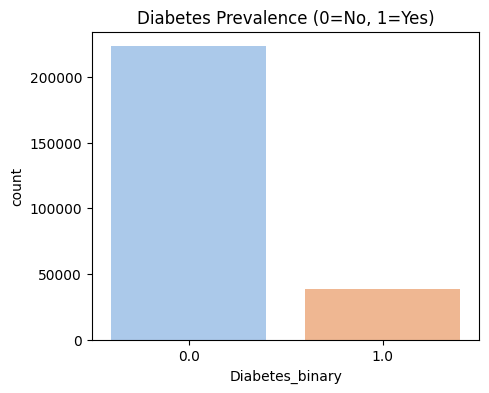

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x='Diabetes_binary', data=df, palette='pastel')
plt.title("Diabetes Prevalence (0=No, 1=Yes)")
plt.show()

# 2.3 Correlation heatmap (numeric features)

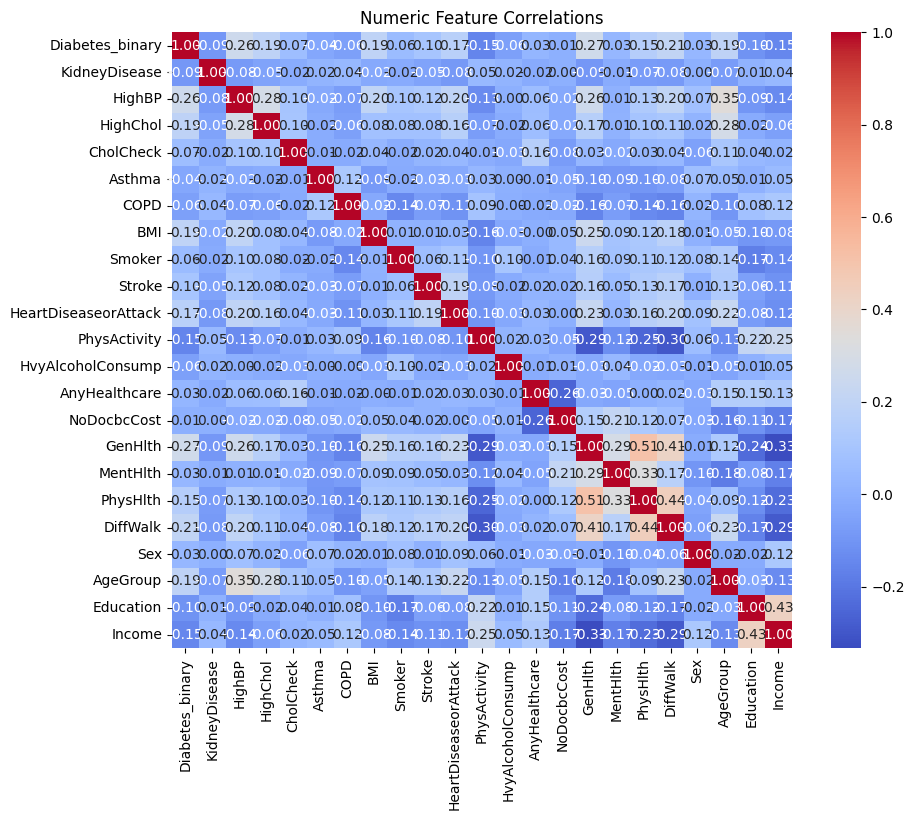

In [6]:
num_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Numeric Feature Correlations")
plt.show()

# 2.4 Histograms for key continuous variables

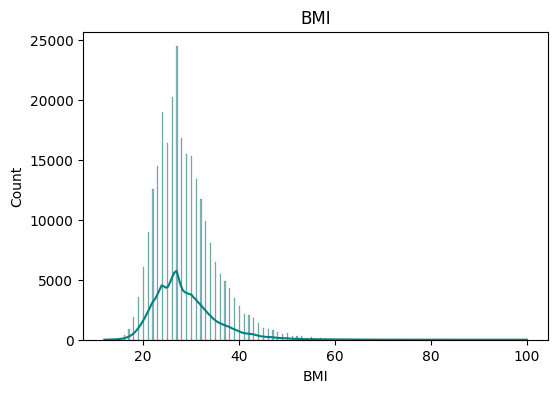

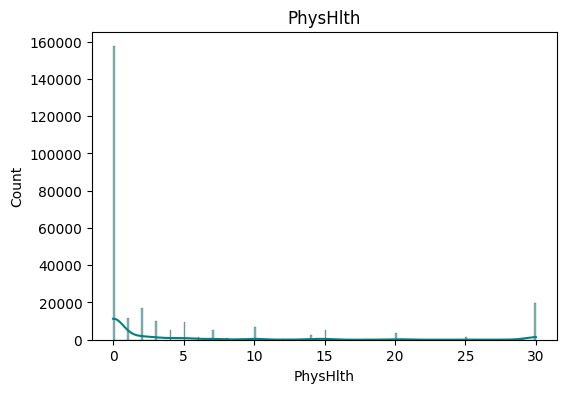

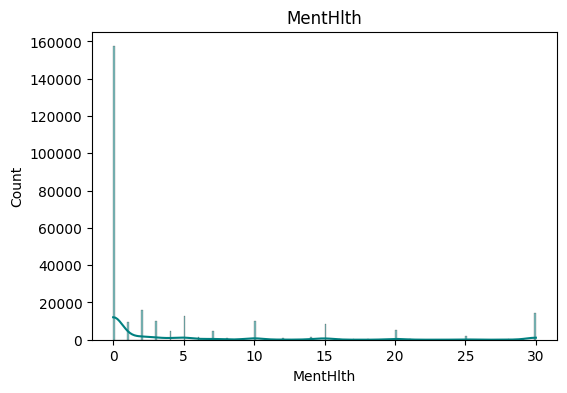

In [7]:
for col in ['BMI', 'PhysHlth', 'MentHlth']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(col)
    plt.show()

# Step 3: Data Preprocessing & Train/Test Split

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

SEED = 42

# 3.1  Check for missing values
print(df.isna().sum())

# 3.2  Separate features & target
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# 3.3  Encode categoricals (all non-numeric columns → dummies)
#      If your categorical columns are already numeric codes, skip this
X = pd.get_dummies(X, drop_first=True)

# 3.4  Train/test split (stratified to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=SEED
)

# 3.5  Build a preprocessing + resampling pipeline
preproc_pipe = ImbPipeline(steps=[
    ('scaler', StandardScaler()),    # scale continuous features
    ('smote',   SMOTE(random_state=SEED))  # oversample minority class only on train
])

#  Fit and resample only on training set
X_train_pp, y_train_pp = preproc_pipe.fit_resample(X_train, y_train)
print("After SMOTE, class distribution:", np.bincount(y_train_pp))

Diabetes_binary         0
KidneyDisease           0
HighBP                  0
HighChol                0
CholCheck               0
Asthma                  0
COPD                    0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
AgeGroup                0
Education               0
Income                  0
dtype: int64
After SMOTE, class distribution: [178674 178674]


# Step 4: Baseline Model Training & Evaluation

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# 4.1  Train a baseline XGBoost
model = XGBClassifier(
    eval_metric='aucpr',
    random_state=SEED
)
model.fit(X_train_pp, y_train_pp)

# 4.2  Predict & evaluate
# Use the fitted scaler from the pipeline to transform X_test
X_test_scaled = preproc_pipe.named_steps['scaler'].transform(X_test)
y_proba = model.predict_proba(X_test_scaled)[:,1]
y_pred  = (y_proba > 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("AUPRC :", average_precision_score(y_test, y_proba))
print(classification_report(y_test, y_pred, target_names=['No Diabetes','Diabetes']))

ROC-AUC: 0.8182983521905396
AUPRC : 0.42576492198759547
              precision    recall  f1-score   support

 No Diabetes       0.88      0.97      0.92     44669
    Diabetes       0.56      0.19      0.28      7649

    accuracy                           0.86     52318
   macro avg       0.72      0.58      0.60     52318
weighted avg       0.83      0.86      0.83     52318



# Step 5: Hyperparameter Tuning with GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 5.1  Wrap preprocessing + model into one pipeline
full_pipe = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote',   SMOTE(random_state=SEED)),
    ('clf',     XGBClassifier(
        use_label_encoder=False,
        eval_metric='aucpr',
        random_state=SEED
    ))
])

# 5.2  Define grid & cross-validator
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth':    [3, 5],
    'clf__learning_rate':[0.01, 0.1]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

grid = GridSearchCV(
    full_pipe,
    param_grid=param_grid,
    scoring='average_precision',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV AUPRC:", grid.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:38:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200}
Best CV AUPRC: 0.42335490948732896


# Step 6: Final Evaluation on Test Set

In [11]:
best_pipe = grid.best_estimator_
y_proba_final = best_pipe.predict_proba(X_test)[:,1]
y_pred_final  = best_pipe.predict(X_test)

print("Test ROC-AUC    :", roc_auc_score(y_test, y_proba_final))
print("Test AUPRC      :", average_precision_score(y_test, y_proba_final))
print(classification_report(y_test, y_pred_final, target_names=['No Diabetes','Diabetes']))


Test ROC-AUC    : 0.8193878245890185
Test AUPRC      : 0.43048669654920846
              precision    recall  f1-score   support

 No Diabetes       0.88      0.97      0.92     44669
    Diabetes       0.54      0.23      0.32      7649

    accuracy                           0.86     52318
   macro avg       0.71      0.60      0.62     52318
weighted avg       0.83      0.86      0.83     52318



# Step 7: Model Interpretability with SHAP

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


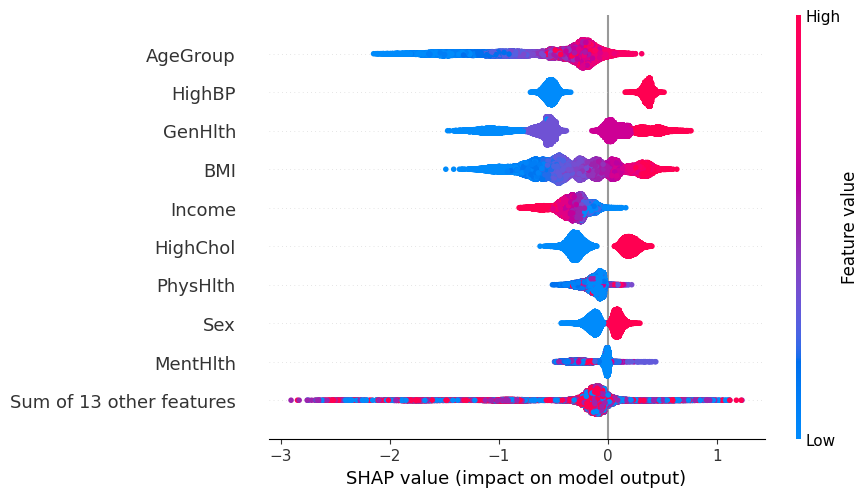

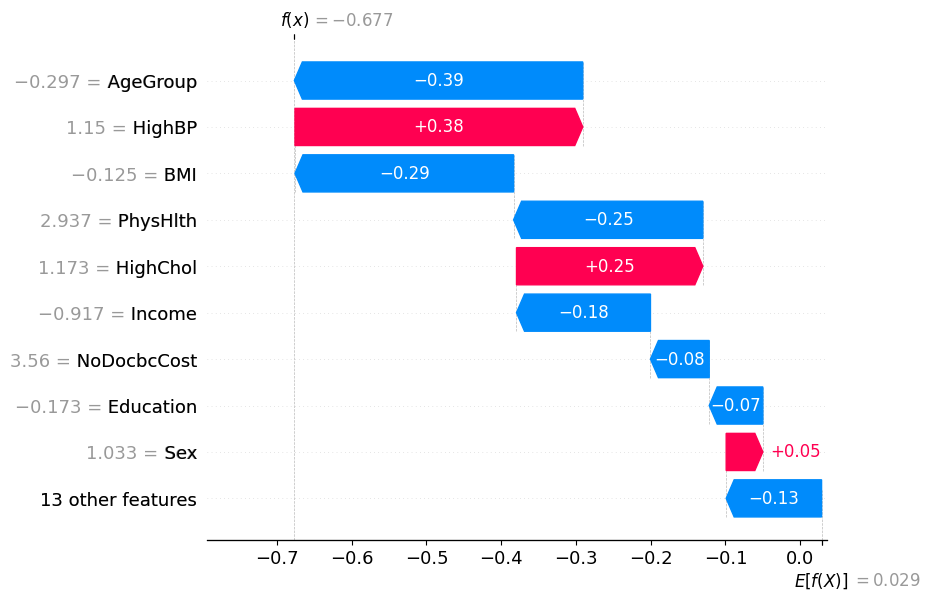

In [12]:
import shap
import matplotlib.pyplot as plt

# 7.1  Fit best pipeline on entire training set
best_pipe.fit(X_train, y_train)

# 7.2  Explainer (TreeExplainer is fastest for XGBoost)
explainer  = shap.TreeExplainer(best_pipe.named_steps['clf'])
X_test_scaled = best_pipe.named_steps['scaler'].transform(X_test)
shap_values = explainer.shap_values(X_test_scaled)

# Create an Explanation object for plotting
# The base value is typically explainer.expected_value for tree models
# The data should be the scaled test data with feature names
explanation = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_test_scaled,
    feature_names=X_test.columns.tolist()
)

# 7.3  Global feature importance (beeswarm)
shap.plots.beeswarm(explanation, max_display=10)
plt.show()

# 7.4  Local explanation for a single sample
shap.plots.waterfall(explanation[0], max_display=10)
plt.show()

# Step 8: Data Product & Dashboard Prototype

8.1 Export Artifacts

In [13]:
import joblib

# Save your best preprocessing + model pipeline
joblib.dump(grid.best_estimator_, 'diabetes_pipeline.pkl')

# Save the SHAP explainer fitted on the final model
# (explainer = shap.TreeExplainer(grid.best_estimator_.named_steps['clf']))
joblib.dump(explainer, 'shap_explainer.pkl')


['shap_explainer.pkl']

In [14]:
# app.py
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import joblib
import numpy as np
import shap

# 1. Load artifacts
pipe      = joblib.load('diabetes_pipeline.pkl')
explainer = joblib.load('shap_explainer.pkl')

# 2. Define input schema
class Patient(BaseModel):
    BMI:           float
    KidneyDisease: int
    HighBP:        int
    HighChol:      int
    CholCheck:     int
    Asthma:        int
    COPD:          int
    Smoker:        int
    Stroke:        int
    HeartDiseaseorAttack: int
    PhysActivity:  int
    HvyAlcoholConsump:   int
    AnyHealthcare:       int
    NoDocbcCost:         int
    GenHlth:       int
    MentHlth:      float
    PhysHlth:      float
    DiffWalk:      int
    Sex:           int
    AgeGroup:      int
    Education:     int
    Income:        int

app = FastAPI(title="Diabetes Risk API")

@app.post("/predict")
def predict(patient: Patient):
    # 3. Convert to DataFrame
    df = pd.DataFrame([patient.dict()])

    # 4. Run through pipeline
    proba = pipe.predict_proba(df)[0,1]
    return {"risk_score": round(proba,4)}

@app.post("/explain")
def explain(patient: Patient):
    df = pd.DataFrame([patient.dict()])
    # 5. Preprocess & get SHAP values
    X_scaled = pipe.named_steps['scaler'].transform(df)
    shap_vals = explainer.shap_values(X_scaled)[0]
    # 6. Return as feature→value dict
    contributions = dict(zip(df.columns, shap_vals.tolist()))
    base_value = float(explainer.expected_value[0])
    return {"base_value": base_value, "contributions": contributions}

# To run: uvicorn app:app --reload --port 8000


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%cd /content/drive/MyDrive/requirements.txt.gdoc


[Errno 20] Not a directory: '/content/drive/MyDrive/requirements.txt.gdoc'
/content


In [25]:
packages = [
    "fastapi",
    "uvicorn",
    "pandas",
    "numpy",
    "scikit-learn",
    "imbalanced-learn",
    "xgboost",
    "shap",
    "pydantic",
]

with open("requirements.txt", "w") as f:
    f.write("\n".join(packages))


In [26]:
!ls -l requirements.txt
!head -n 10 requirements.txt


-rw-r--r-- 1 root root 80 Aug 28 23:02 requirements.txt
fastapi
uvicorn
pandas
numpy
scikit-learn
imbalanced-learn
xgboost
shap
pydantic

In [27]:
pip install -r requirements.txt


In [29]:
# adjust path to your preferred folder
!mkdir -p "/content/drive/MyDrive/Colab Notebooks/my_project"


In [30]:
!mv requirements.txt "/content/drive/MyDrive/Colab Notebooks/my_project/"


In [31]:
!ls "/content/drive/MyDrive/Colab Notebooks/my_project/"


requirements.txt


In [41]:
%cd "/content/drive/MyDrive/Colab Notebooks/my_project"
!git init                     # only if not already a repo
!git add requirements.txt
!git commit -m "Add requirements.txt"
!git remote add origin https://github.com/23061223/Ensemble-Machine-Learning-for-Early-Diabetes-Detection.git  # if not set
!git push -u origin main


/content/drive/MyDrive/Colab Notebooks/my_project
Reinitialized existing Git repository in /content/drive/MyDrive/Colab Notebooks/my_project/.git/
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@4dcf461ae6f0.(none)')
error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/USERNAME/REPO.git'


In [33]:
!touch main.py
!mkdir -p data notebooks


In [34]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Hello, FastAPI in Colab!"}


In [36]:
# Install pyngrok to expose the FastAPI application
!pip install pyngrok --quiet

In [40]:
# In a code cell:
import nest_asyncio, uvicorn
from pyngrok import ngrok

# Change the current directory to where main.py is located
%cd "/content/drive/MyDrive/Colab Notebooks/my_project"

from main import app

nest_asyncio.apply()
# Specify the protocol to ensure a single tunnel is created
public_url = ngrok.connect(8000, proto='http').public_url
print("🚀 Public URL:", public_url)

uvicorn.run(app, host="0.0.0.0", port=8000)

/content/drive/MyDrive/Colab Notebooks/my_project


ImportError: cannot import name 'app' from 'main' (/content/drive/MyDrive/Colab Notebooks/my_project/main.py)